In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from Painter import Painter

# Keypoints

In [3]:
name = 'sacre_coeur_A.jpg'

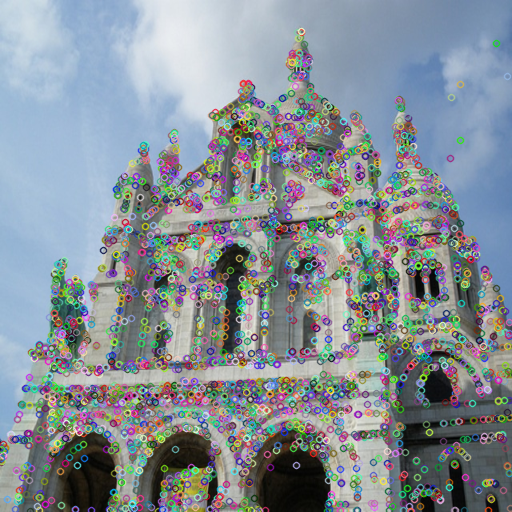

In [4]:
Painter.show_keypoints(name)

# Matches

In [7]:
name_a = 'sacre_coeur_A.jpg'
name_b = 'sacre_coeur_B.jpg'

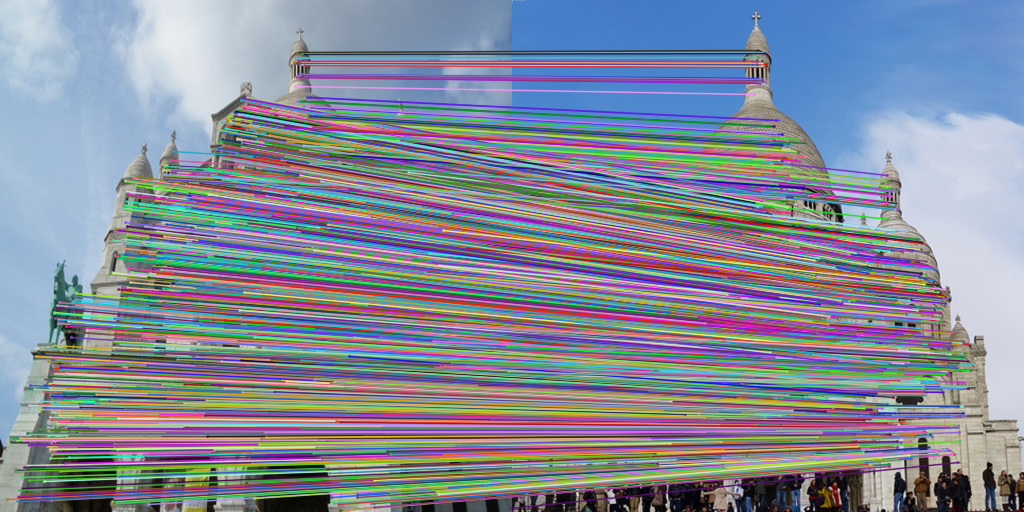

In [8]:
Painter.show_keypoint_matches(name_a, name_b, num_points=None)

DEBUG    | load_filtered_matches | matches.shape torch.Size([731, 4])
DEBUG    | load_filtered_matches | len(self.left_matches_coords_filtered) 731
DEBUG    | show_filtered_keypoint_matches | num_points 731


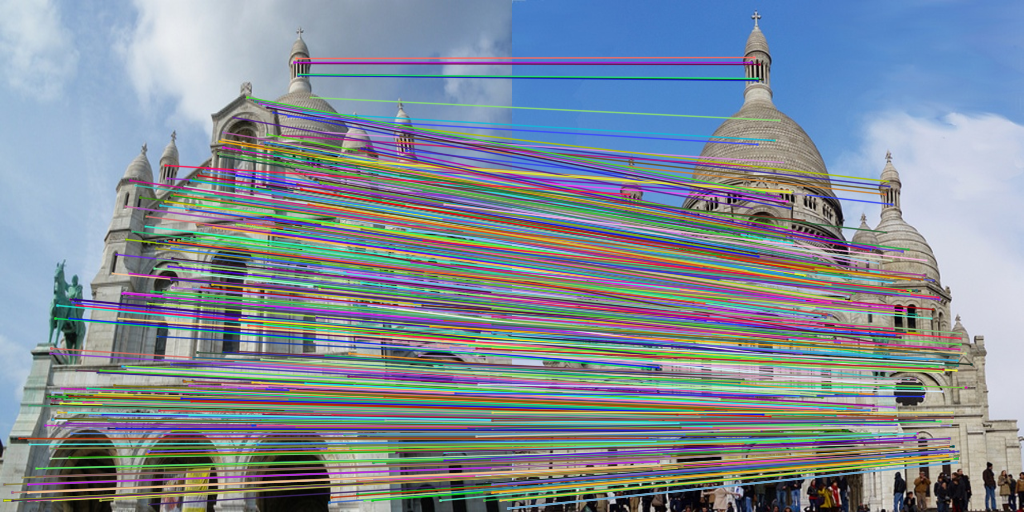

In [18]:
Painter.show_filtered_keypoint_matches(name_a, name_b, num_points=None)